In [25]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import gridspec
from matplotlib.ticker import MaxNLocator
from scipy.optimize import curve_fit
#import astropy.constants as const
import csv
import math
import numpy

In [2]:
archean_data = pd.read_csv('../../DATA/anoxic_archeanEarth_climate_grid.csv', sep='\t', header=None, skiprows=1)
procb_data = pd.read_csv('../../DATA/procb_anoxic_climate_grid.csv', sep='\t', header=None, skiprows=1)
procb_2col_data = pd.read_csv('../../DATA/procb_lowCO2_climate_2column_climate_grid.csv',  sep='\t', header=None, skiprows=1)

In [3]:
archean_data.shape

(61, 4)

In [13]:
arch_p, arch_t, arch_z = archean_data[1], archean_data[2], archean_data[3]
proc_p, proc_t, proc_z = procb_data[1], procb_data[2], procb_data[3]
day_2col_p, day_2col_t, day_2col_z = procb_2col_data[1][0:61], procb_2col_data[2][0:61], procb_2col_data[3][0:61]
night_2col_p, night_2col_t, night_2col_z = procb_2col_data[1][62:124], procb_2col_data[2][62:124], procb_2col_data[3][62:124]

[]

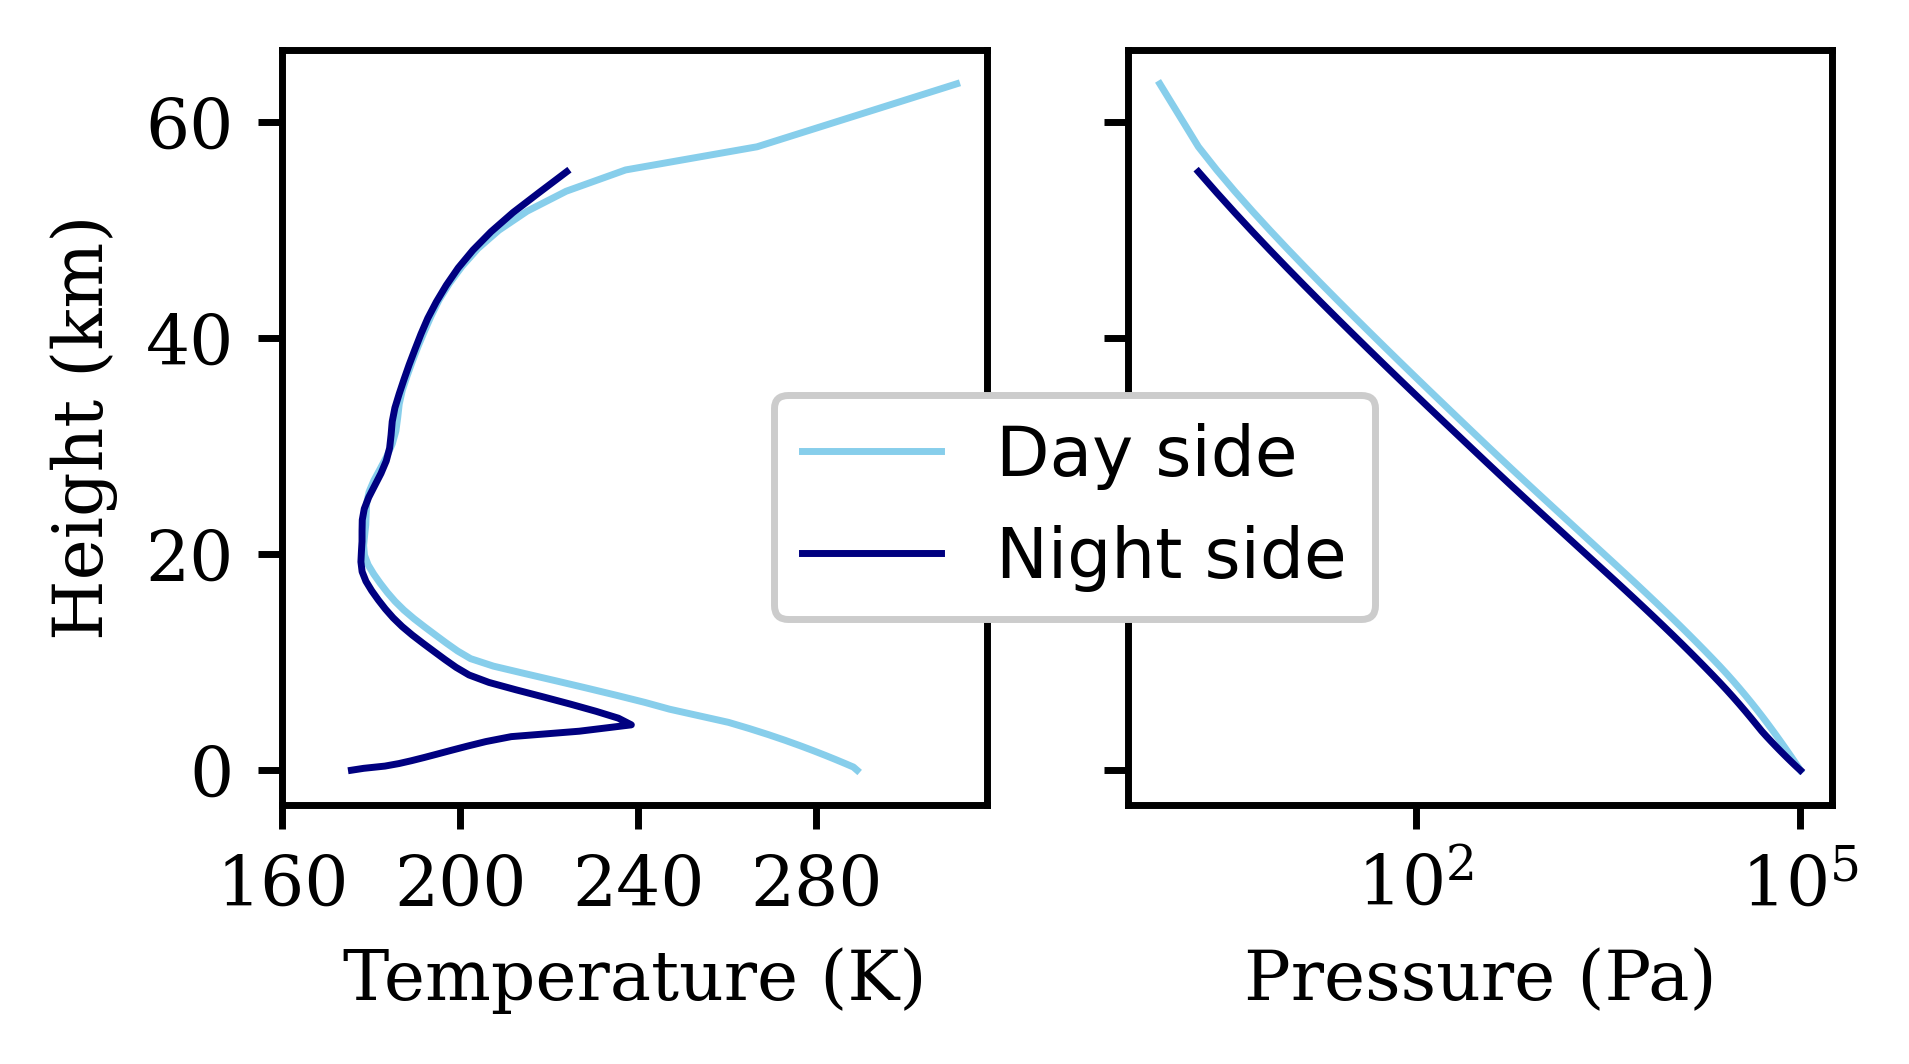

In [24]:
fig = plt.figure(figsize=(4,2), dpi= 500, facecolor='w', edgecolor='k')
(ax1, ax2) = fig.subplots(1, 2, sharey=True)
ax2.set_zorder(-1)

#ax1.plot(arch_t, arch_z/1e3,color='black', label=r'Archean',linewidth=1)
#ax1.plot(proc_t ,proc_z/1e3,color='black',label='1-column',linewidth=1)
ax1.plot(day_2col_t ,day_2col_z/1e3,color='skyblue',label='Day side',linewidth=1)
ax1.plot(night_2col_t ,night_2col_z/1e3,color='navy',label='Night side',linewidth=1)

#ax2.plot(arch_p, arch_z/1e3,color='black', label=r'Archean',linewidth=1)
ax2.plot(day_2col_p ,day_2col_z/1e3,color='skyblue',label='Day side',linewidth=1)
ax2.plot(night_2col_p ,night_2col_z/1e3,color='navy',label='Night side',linewidth=1)

ax2.set_xscale('log')

ax1.set_axisbelow(True)
for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(1)

for tick in ax1.get_xticklabels():
    tick.set_fontname("Serif")
    tick.set_fontsize(10)
for tick in ax1.get_yticklabels():
    tick.set_fontname("Serif")
    tick.set_fontsize(10)
    
ax1.xaxis.set_tick_params(width=1)
ax1.yaxis.set_tick_params(width=1)

ax2.set_axisbelow(True)
for axis in ['top','bottom','left','right']:
  ax2.spines[axis].set_linewidth(1)

for tick in ax2.get_xticklabels():
    tick.set_fontname("Serif")
    tick.set_fontsize(10)
for tick in ax2.get_yticklabels():
    tick.set_fontname("Serif")
    tick.set_fontsize(10)
    
ax2.xaxis.set_tick_params(width=1)
ax2.yaxis.set_tick_params(width=1)

#ax.invert_yaxis()
#ax.set_xscale('log')
#ax.set_xlim(xmin=1e-7,xmax=1e-2)
#ax.set_ylim(ymin=0,ymax=80)
ax1.xaxis.set_ticks([160,200,240,280])

ax1.set_xlabel(r'Temperature (K)', fontname='Serif', fontsize=10)
ax2.set_xlabel(r'Pressure (Pa)', fontname='Serif', fontsize=10)
ax1.set_ylabel('Height (km)', fontname='serif', fontsize=10)
ax1.legend(fontsize=10,loc='lower right',bbox_to_anchor=(1.6,0.2),framealpha=1.0)
#ax1.legend(fontsize=10,loc='upper right')
plt.savefig('procb_PT_2col.jpg',bbox_inches='tight')
plt.plot()

In [26]:
modEarth_data = pd.read_csv('../../DATA/modern_earth_gregory2021_climate_grid.csv', sep='\t', header=None, skiprows=3)
mod_p, mod_t, mod_z = modEarth_data[1], modEarth_data[2], modEarth_data[3]


[]

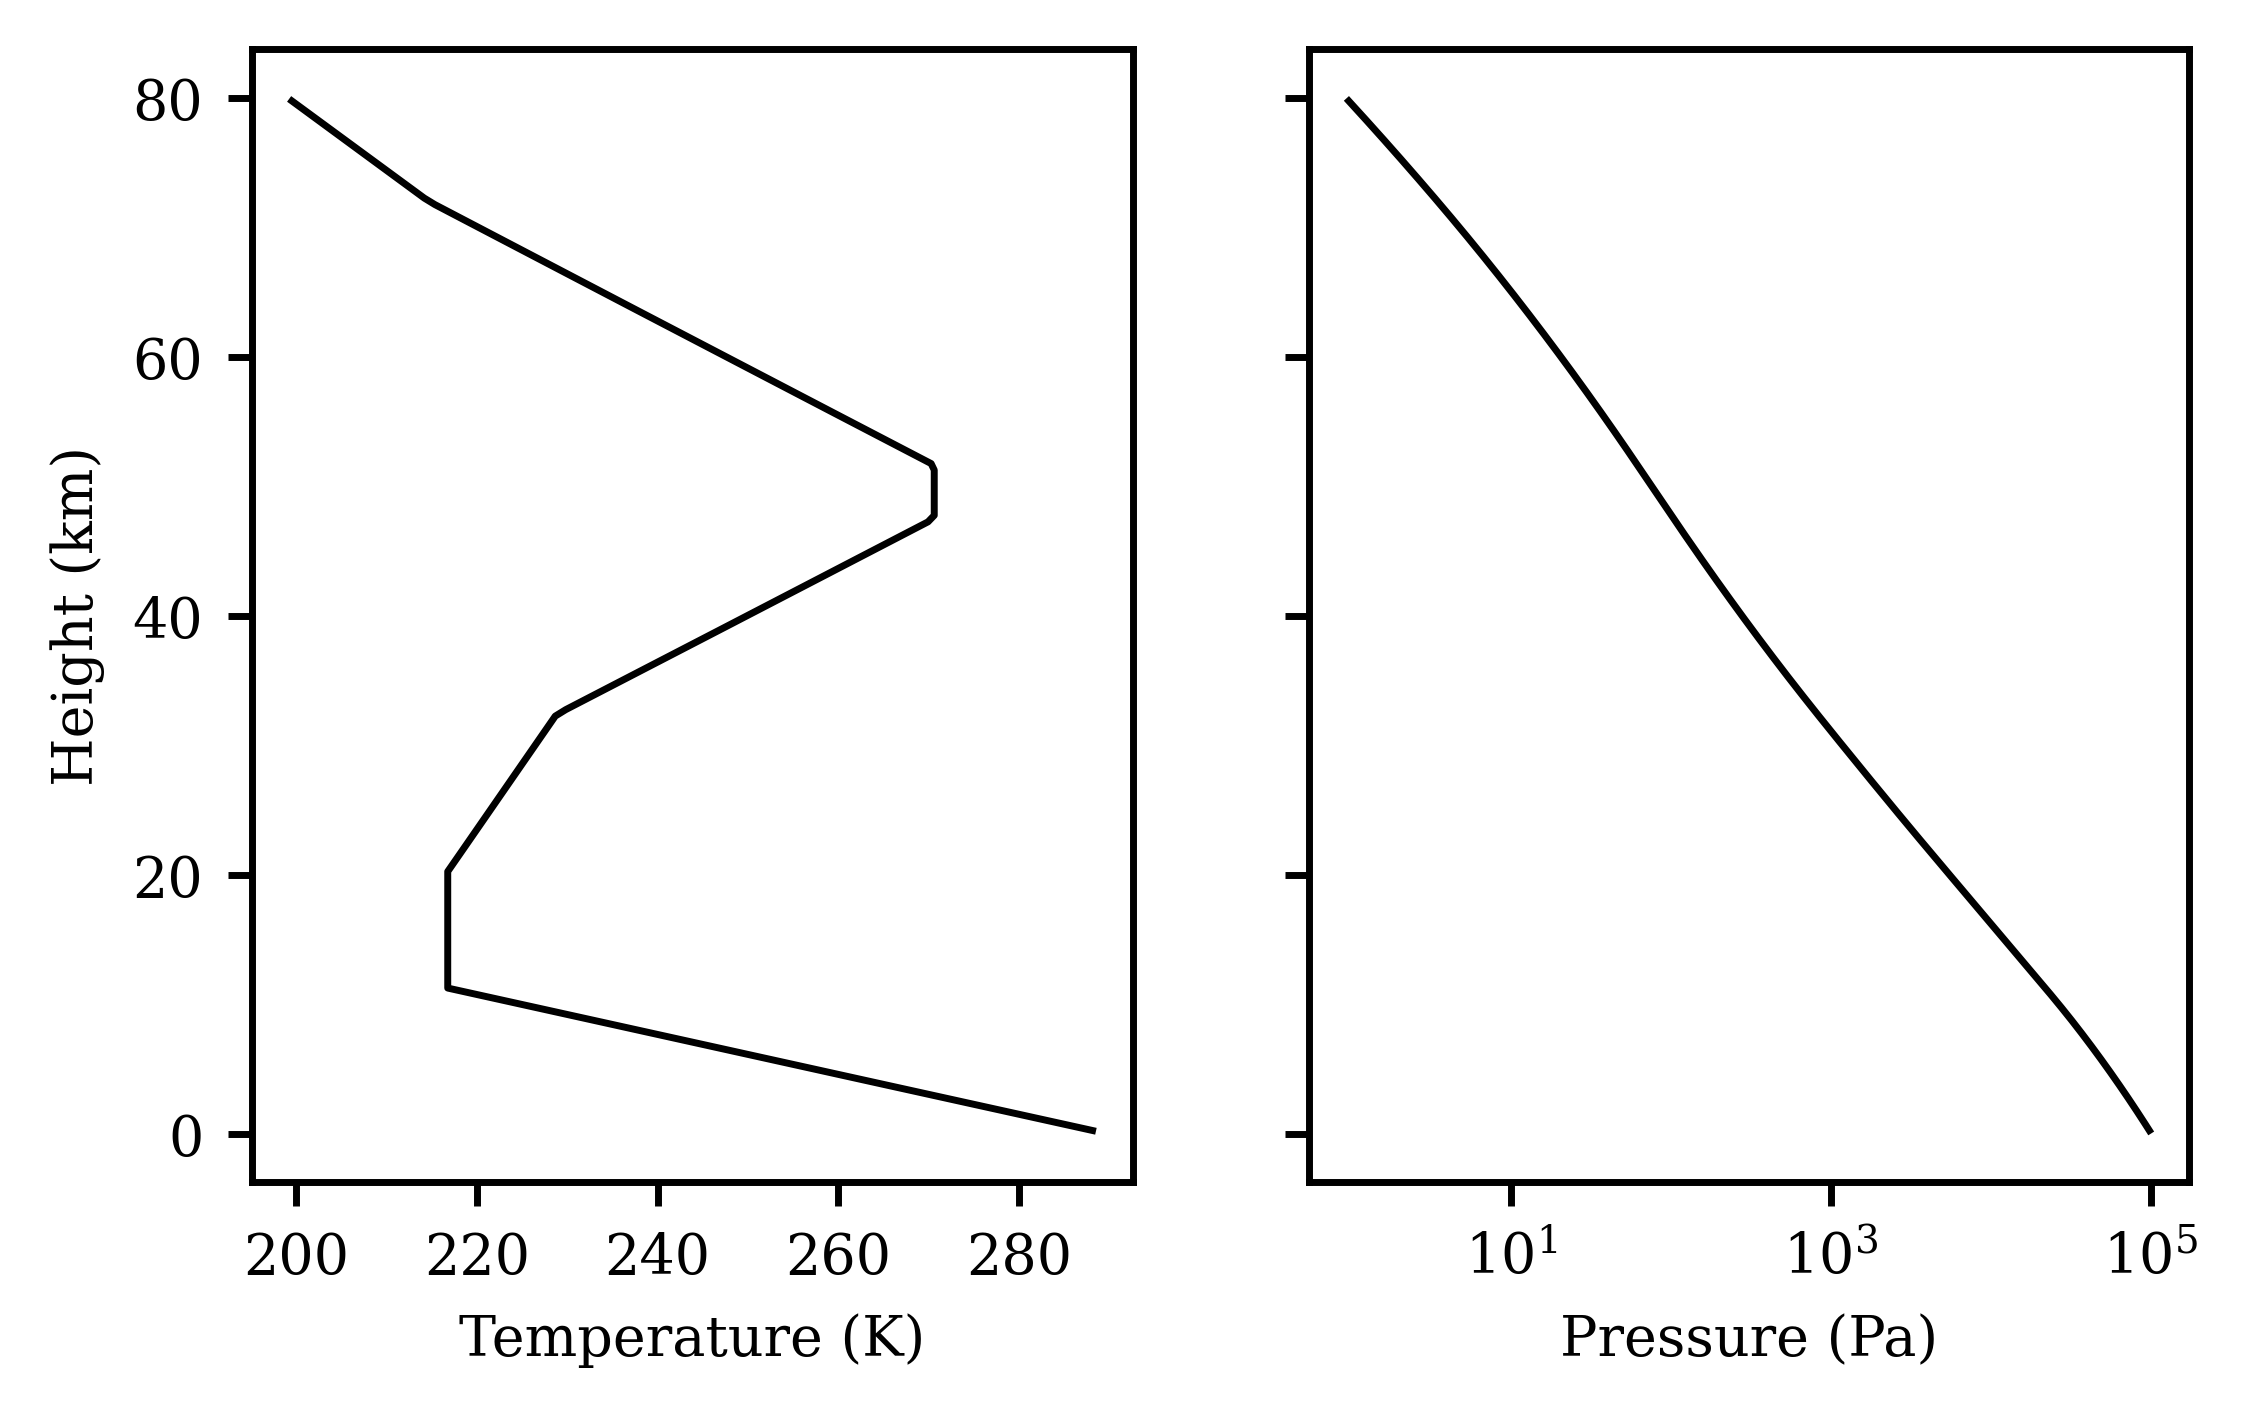

In [28]:
fig = plt.figure(figsize=(5,3), dpi= 500, facecolor='w', edgecolor='k')
(ax1, ax2) = fig.subplots(1, 2, sharey=True)
ax1.plot(mod_t, mod_z/1e3,color='black',linewidth=1)

ax2.plot(mod_p, mod_z/1e3,color='black',linewidth=1)
ax2.set_xscale('log')

ax1.set_axisbelow(True)
for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(1)

for tick in ax1.get_xticklabels():
    tick.set_fontname("Serif")
    tick.set_fontsize(8)
for tick in ax1.get_yticklabels():
    tick.set_fontname("Serif")
    tick.set_fontsize(8)
    
ax1.xaxis.set_tick_params(width=1)
ax1.yaxis.set_tick_params(width=1)

ax2.set_axisbelow(True)
for axis in ['top','bottom','left','right']:
  ax2.spines[axis].set_linewidth(1)

for tick in ax2.get_xticklabels():
    tick.set_fontname("Serif")
    tick.set_fontsize(8)
for tick in ax2.get_yticklabels():
    tick.set_fontname("Serif")
    tick.set_fontsize(8)
    
ax2.xaxis.set_tick_params(width=1)
ax2.yaxis.set_tick_params(width=1)

#ax.invert_yaxis()
#ax.set_xscale('log')
#ax.set_xlim(xmin=1e-7,xmax=1e-2)
#ax.set_ylim(ymin=0,ymax=80)
ax1.xaxis.set_ticks([200,220,240,260,280])

ax1.set_xlabel(r'Temperature (K)', fontname='Serif', fontsize=8)
ax2.set_xlabel(r'Pressure (Pa)', fontname='Serif', fontsize=8)
ax1.set_ylabel('Height (km)', fontname='serif', fontsize=8)

#ax.legend(fontsize=10,loc='upper right')
plt.savefig('modEarth_PT_profile.jpg',bbox_inches='tight')
plt.plot()